<a href="https://colab.research.google.com/github/EzeRivero/Data-Science-II/blob/main/IA_Job_Rivero_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science II: Entrega Final
##Ezequiel Rivero
###Comisión 90455



#Introducción
En este trabajo estaré utilizando un dataset obtenido desde Kaggle.com, el cual trata de información sobre puestos de trabajo y salarios relacionados con Inteligencia Artificial, y tendencias en cuanto al mercado laboral global.

Elegí este dataset ya que es un tema en auge en la actualidad, y me pareció interesante analizarlo, además de que esta base de datos cumple con todos los requisitos de la entrega (tamaño, cantidad de variables, etc.). Es una temática que se encuentra en crecimiento y un mercado laboral de alta demanda, por lo que este análisis puede ser valioso. Cabe mencionar que los datos fueron generados artificialmente mediante herramientas de IA, por lo que no se tomaron fuentes de datos reales, aunque no impide su uso educacional y práctico.



##Objetivo

El **objetivo** será ***analizar los factores que influyen sobre el salario anual***, tanto demográficos como laborales, y poder desarrollar un modelo predictivo de regresión para poder estimar el mismo. Es por ello que para orientarnos en la elaboración de las hipótesis, buscaremos responder las siguientes preguntas:
+ ¿Cómo varía el salario anual según el nivel de experiencia (Entry, Mid, Senior, Executive)?
+ ¿Hay diferencias significativas entre las distintos grados de presencialidad (Remoto, Híbrido, Presencial)?
+ ¿Hay países que tengan, en promedio, mejores salarios que otros?
+ ¿Cómo se relacionan las variables como experiencia, presencialidad y país simultaneamente, con el salario anual?
+ ¿Hay alguna/s otra/s variable/s que modifique/n el salario anual de manera relevante?

##Contexto comercial
Para este trabajo, abordaremos el rol de una empresa consultora, dedicada al análisis estratégico, gestión y desarrollo de personas, y estudios de mercado y de opinión pública, para encontrar insights del mercado laboral relacionado a IA, y poder especializarse en este creciente sector.

#Hipótesis
Hipótesis Nula (H0): No existe una relación estadísticamente significativa entre alguna de las características laborales y el salario anual.

Hipótesis Alternativa (HA): Es posible construir un modelo de regresión utilizando las características disponibles que prediga el salario promedio con un coeficiente de determinación (R²) significativamente superior a 0.5 (idealmente > 0.6 para considerarlo útil) y un Error Absoluto Medio (MAE) razonablemente bajo, a partir de las características laborales.

Para comenzar con el análisis de los datos, importamos las librerías que utilizaremos, cargamos el dataset y observamos sus características generales:

#Glosario
+ job_id:	Id único para cada oferta de empleo.
+ job_title:	título del puesto estandarizado.
+ salary_usd:	Salario anual en dólares estadounidenses.
+ salary_currency:	Moneda original del salario.
+ experience_level:	Nivel de experiencia o señority: EN (Entry, Principiante), MI (Mid, Intermedio), SE (Senior), EX (Executive, Ejecutivo).
+ employment_type: Tipo de empleo:	FT (Full-time o tiempo completo), PT (Part-time o medio tiempo), CT (Contract o contrato), FL (Freelance o autónomo).
+ company_location:	País donde se ubica la empresa.
+ company_size:	Tamaño de la empresa según empleados: S (Pequeña <50), M (Mediana 50-250), L (Grande >250).
+ employee_residence:	País donde vive el empleado.
+ remote_ratio:	Proporción de (no) presencialidad del puesto: 0 (No remoto o presencial), 50 (Híbrido), 100 (completamente remoto).
+ required_skills:	Las 5 habilidades más requeridas(separadas por comas).
+ education_required:	El nivel mínimo de educación requerido.
+ years_experience:	Años de experiencia requeridos.
+ industry:	Sector industrial de la empresa.
+ posting_date:	Fecha en donde se publicó el puesto
+ application_deadline:	Fecha límite de solicitud.
+ job_description_length:	Recuento de caracteres de la descripción de puesto.
+ benefits_score:	Puntuación numérica del paquete de beneficios (1-10).
+ company_name: Nombre de la empresa.

#Análisis exploratorio de datos (EDA) y Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb

In [2]:
url = 'https://raw.githubusercontent.com/EzeRivero/Data-Science-II/refs/heads/main/ai_job_dataset.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.shape

(15000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
#Formateamos a formato datetime las columnas con fechas (para ver el cambio, ejecutamos nuevamente df.info)

df['application_deadline'] = pd.to_datetime(df['application_deadline'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [7]:
df.dtypes['application_deadline']
df.dtypes['posting_date']

dtype('<M8[ns]')

In [8]:
#Nos aseguramos que no hay presencia de valores nulos ni duplicados
print(df.isnull().sum())
df.duplicated().value_counts()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


,count
False,15000


In [9]:
#Datos estadísticos descriptivos de las variables numéricas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
salary_usd,15000.0,115348.965133,32519.0,70179.75,99705.0,146408.5,399095.0,60260.940438
remote_ratio,15000.0,49.483333,0.0,0.0,50.0,100.0,100.0,40.812712
years_experience,15000.0,6.2532,0.0,2.0,5.0,10.0,19.0,5.545768
posting_date,15000,2024-08-29 08:48:51.840000,2024-01-01 00:00:00,2024-04-29 00:00:00,2024-08-28 00:00:00,2024-12-29 00:00:00,2025-04-30 00:00:00,NaN
application_deadline,15000,2024-10-11 21:55:23.520000,2024-01-16 00:00:00,2024-06-13 00:00:00,2024-10-12 00:00:00,2025-02-10 00:00:00,2025-07-11 00:00:00,NaN
job_description_length,15000.0,1503.314733,500.0,1003.75,1512.0,2000.0,2499.0,576.127083
benefits_score,15000.0,7.504273,5.0,6.2,7.5,8.8,10.0,1.45087


In [10]:
#Datos estadísticos descriptivos de las variables tipo object
df.describe(include = 'object').T

,count,unique,top,freq
job_id,15000,15000,AI15000,1
job_title,15000,20,Machine Learning Researcher,808
salary_currency,15000,3,USD,11957
experience_level,15000,4,MI,3781
employment_type,15000,4,FT,3812
company_location,15000,20,Germany,814
company_size,15000,3,S,5007
employee_residence,15000,20,Sweden,790
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17
education_required,15000,4,Bachelor,3789


Luego de un pantallazo general, procederemos a ver un boxplot y un histograma de lo que será la variable objetivo: salary_usd

<Figure size 1200x700 with 0 Axes>

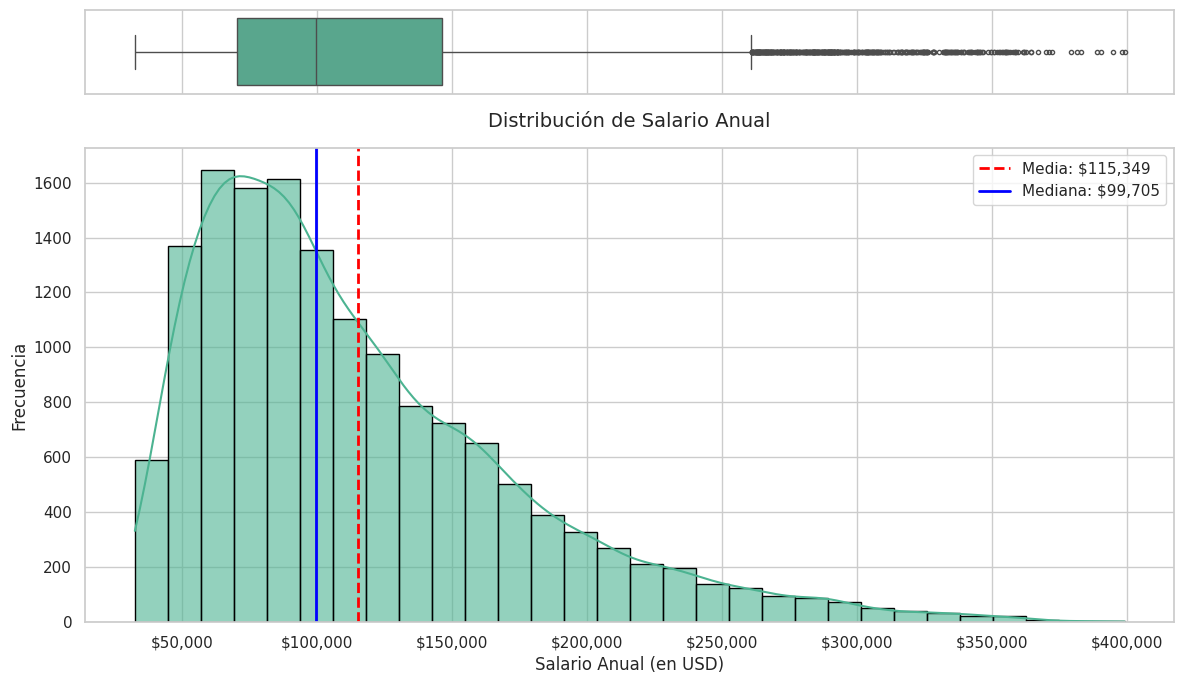

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 7))

#Boxplot
sns.boxplot(x=df['salary_usd'], ax=ax_box, color="#4CB391", fliersize=3)
ax_box.set(xlabel='')

#Histograma con KDE
sns.histplot(df['salary_usd'], ax=ax_hist, kde=True, bins=30, color="#4CB391", edgecolor='black', alpha=0.6)

#También sumamos la media y la mediana
media = df['salary_usd'].mean()
mediana = df['salary_usd'].median()

ax_hist.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: ${media:,.0f}')
ax_hist.axvline(mediana, color='blue', linestyle='-', linewidth=2, label=f'Mediana: ${mediana:,.0f}')

ax_hist.set_title('Distribución de Salario Anual', fontsize=14, pad=15)
ax_hist.set_xlabel('Salario Anual (en USD)', fontsize=12)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.legend()

ax_hist.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

Como podemos ver, el salario anual tiene una distribución hacia valores más bajos (mediana de 99.705 dólares, y un promedio de 115.349 dólares). Abajo veremos la cantidad de outliers presentes, para posteriormente ver qué podemos hacer con ellos para mejorar el modelo.

In [12]:
subset = df['salary_usd']
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
total_outliers_count = len(outliers)

print("Número total de outliers en salary_usd:")
print(f"  Total: {total_outliers_count}")
print(f" Porcentaje de outliers sobre el total de registros: {(( len(outliers) / 15000)*100):2f}")

Número total de outliers en salary_usd:
  Total: 483
 Porcentaje de outliers sobre el total de registros: 3.220000


Como podemos observar, la presencia de outliers representa un 3,22 % de los registros totales.

Esto podría afectar el rendimiento del modelo para predecir valores muy altos (extremo derecho).

Comenzando con niveles de experiencia, veremos un gráfico boxplot para observar cómo varía según cada categoría:

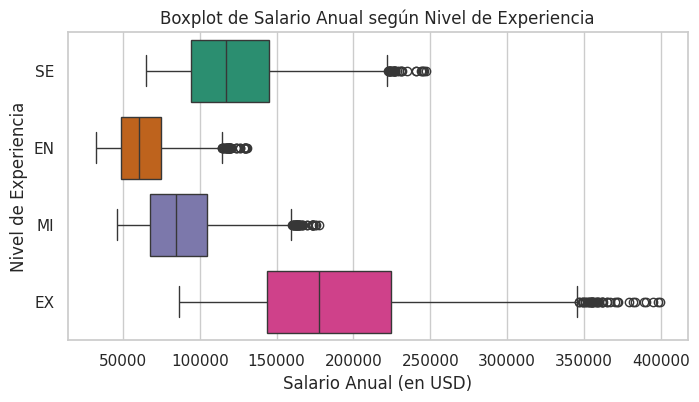

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='salary_usd', y='experience_level', hue='experience_level', palette='Dark2', legend=False)
plt.title('Boxplot de Salario Anual según Nivel de Experiencia')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Nivel de Experiencia')
plt.show()

Acá podemos notar que, a medida que avanza el nivel de experiencia requerido para el puesto (Entry->Mid->Senior->Executive), los salarios crecen.

Abajo continuamos con respecto a Tipo de Empleo (Part Time, Full Time, Contrato o Freelance):


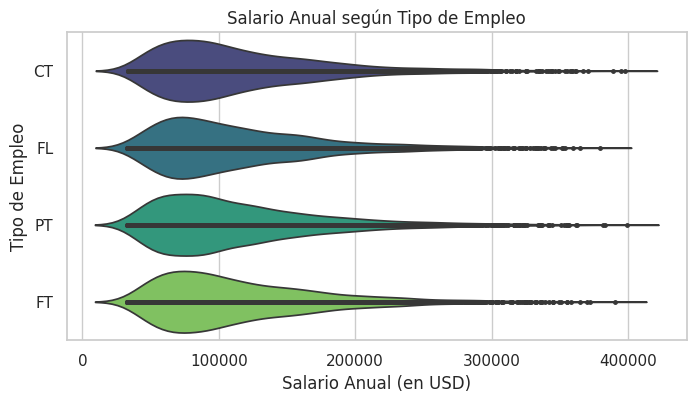

In [14]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='salary_usd', y='employment_type', hue='employment_type', inner='point', density_norm='count', palette='viridis')
plt.title('Salario Anual según Tipo de Empleo')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Tipo de Empleo')
plt.show()

En este caso, vemos que apenas varían los salarios según estos parámetros.

Ahora analizaremos la distribución del salario por países (donde cada empresa se ubica geográficamente), teniendo presente que uno de nuestros analistas sugirió que *las ofertas laborales de países europeos superan en salario a países del continente asiático*. Probaremos esta hipótesis:

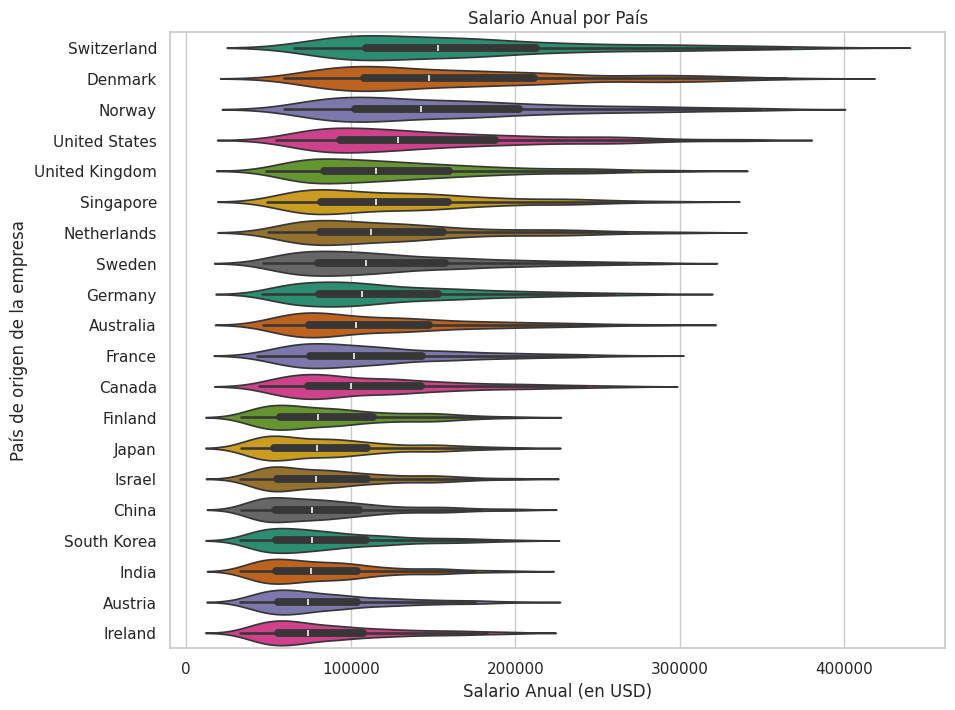

In [15]:
# Primeramente, para tener los países ordenados de mayor a menor, tomaremos la mediana como referencia
Salario_por_país_mediana = df.groupby('company_location')['salary_usd'].median().sort_values(ascending=False)

df['company_location'] = pd.Categorical(df['company_location'], categories=Salario_por_país_mediana.index, ordered=True)

# Finalmente creamos el gráfico de violín con los datos en orden descendente
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='salary_usd', y='company_location', inner='box', palette='Dark2', hue='company_location', legend=False)
plt.title('Salario Anual por País')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('País de origen de la empresa')
plt.show()

Aquí, las conclusiones son un poco más complejas. Hay países europeos a lo largo de toda la lista, aunque destacan Suiza, Dinamarca y Noruega como los de mejores salarios (y Estados Unidos en el top 4). Con respecto a países asiáticos, India, Corea del Sur, China y Japón están por debajo del top 10 (salvo por Singapur en sexto lugar).

Redefiniendo la afirmación hipotética, podríamos acordar en que ciertos países occidentales pagan en promedio salarios mayores con respecto a países orientales, con la excepción de algunos países europeos como Irlanda, Austria y Finlandia.

Sin embargo, prefiero descartar esta hipótesis ya que depende no tanto del continente, sino de características particulares de cada país.



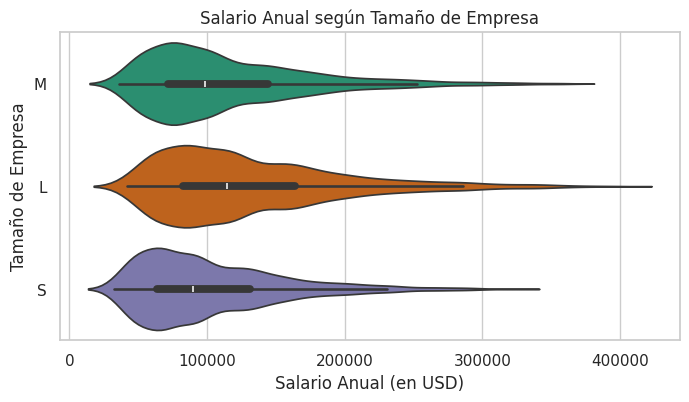

In [16]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='salary_usd', y='company_size', hue='company_size', inner='box', palette='Dark2')
plt.title('Salario Anual según Tamaño de Empresa')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Tamaño de Empresa')
plt.show()

Aquí arriba, vemos que los sueldos mejoran progresivamente a medida que el tamaño de la empresa aumenta, por lo cual es un factor a tener en cuenta para el modelo a utilizar.

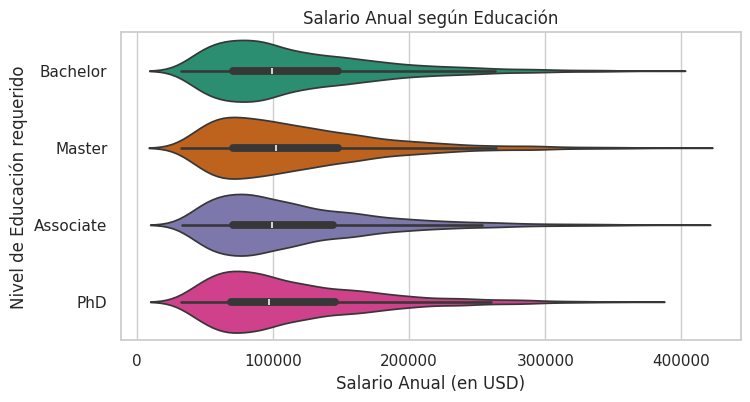

In [17]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='salary_usd', y='education_required', hue='education_required', inner='box', palette='Dark2')
plt.title('Salario Anual según Educación')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Nivel de Educación requerido')
plt.show()

Como vemos, en este caso el nivel de educación no parece ser un factor determinante para el salario, al estar distribuido más o menos equitativamente entre los distintos niveles.

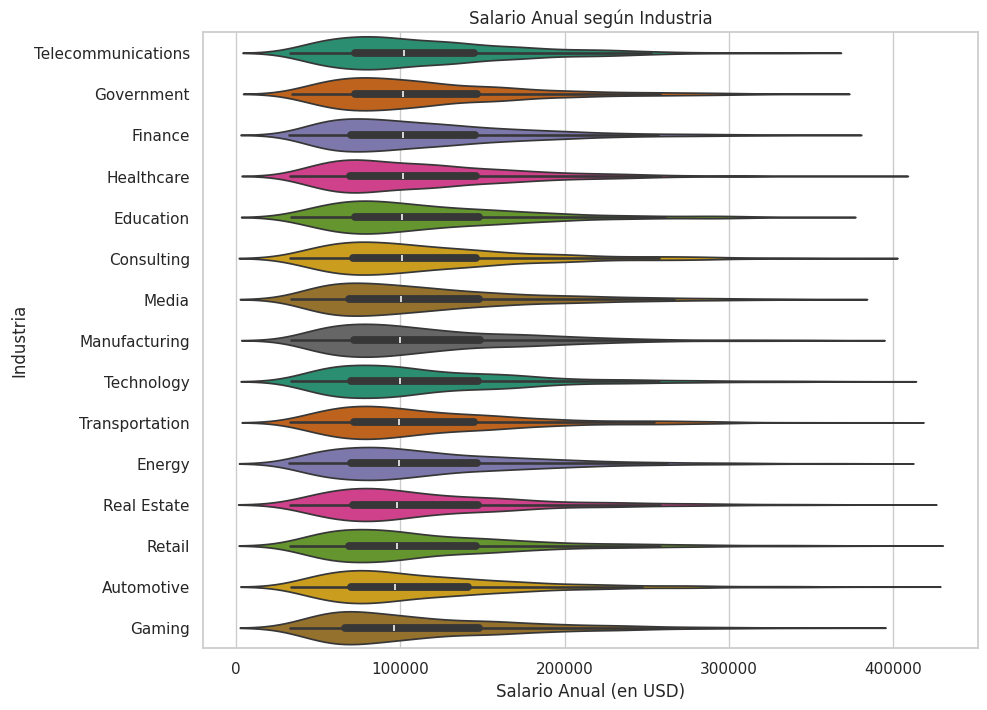

In [18]:
#Al igual que con company_location, ordenaremos los salarios según la mediana, distinguiendo por tipo de industria.

Salario_por_industria_mediana = df.groupby('industry')['salary_usd'].median().sort_values(ascending=False)

df['industry'] = pd.Categorical(df['industry'], categories=Salario_por_industria_mediana.index, ordered=True)

#Ahora, con los valores ordenados, generamos un violinplot

plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='salary_usd', y='industry', hue='industry', inner='box', palette='Dark2')
plt.title('Salario Anual según Industria')
plt.xlabel('Salario Anual (en USD)')
plt.ylabel('Industria')
plt.show()

Casi que como sucede con los países de origen, en el caso de las diferentes industrias, podriamos decir que conservan una distribución de salarios similar.

A modo de resumen, con el EDA pudimos descubrir que las variables más importantes que influyen en el salario son: nivel de experiencia, y en menor medida tamaño de empresa, y haciendo el comentario de que ciertos países tienen mejor salario promedio que otros, pero sin ninguna pauta continental clara.

#Feature Selection / Data Wrangling

Antes de ejecutar los modelos de Machine Learning, procederemos a hacer algunos ajustes en los datos.

En primer lugar, trataremos esos outliers vistos previamente:



In [19]:
df_no_outliers = df[(df['salary_usd'] >= lower_bound) & (df['salary_usd'] <= upper_bound)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame without outliers shape: {df_no_outliers.shape}")

Original DataFrame shape: (15000, 19)
DataFrame without outliers shape: (14517, 19)


In [20]:
#Ya con los outliers eliminados, volveremos a nombrar nuestra tabla de datos como df
df = df_no_outliers
df.shape

(14517, 19)

Ahora vamos a reducir la dimensionalidad del dataset quitando las columnas que no son relevantes para el análisis:

In [21]:
#Procedemos a dropear esas columnas que no vamos a ocupar para el modelo, quedando
drop_cols = [
    "job_id", "job_description_length", "posting_date", "application_deadline"
    ]

df = df.drop(columns=drop_cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14517 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job_title           14517 non-null  object  
 1   salary_usd          14517 non-null  int64   
 2   salary_currency     14517 non-null  object  
 3   experience_level    14517 non-null  object  
 4   employment_type     14517 non-null  object  
 5   company_location    14517 non-null  category
 6   company_size        14517 non-null  object  
 7   employee_residence  14517 non-null  object  
 8   remote_ratio        14517 non-null  int64   
 9   required_skills     14517 non-null  object  
 10  education_required  14517 non-null  object  
 11  years_experience    14517 non-null  int64   
 12  industry            14517 non-null  category
 13  benefits_score      14517 non-null  float64 
 14  company_name        14517 non-null  object  
dtypes: category(2), float64(1), int64(3), obj

In [22]:
#Estandarizamos la variable "job_title", para que no haya variables duplicadas
df['job_title'] = df['job_title'].str.lower().str.strip()
df['job_title']

,job_title
0,ai research scientist
1,ai software engineer
2,ai specialist
3,nlp engineer
4,ai consultant
...,...
14995,robotics engineer
14996,machine learning researcher
14997,nlp engineer
14998,head of ai


In [23]:
#Ahora continuamos con el nivel de experiencia, realizando un mapeo para convertir
# los valores categóricos a valores numéricos ordinales, según los estándares del
# mercado laboral (por eso se suma Lead, aunque no esté incluido en el dataset,
# pero que generalmente ocupa su lugar jerárquico entre senior y executive)

exp_map_text = {
    'EN': 'entry_level',
    'MI': 'mid_level',
    'SE': 'senior',
    'EX': 'executive'
}

df['experience_level_text'] = df['experience_level'].map(exp_map_text)

exp_map = {
    'entry_level': 0,
    'mid_level': 1,
    'senior': 2,
    'lead': 3,
    'executive': 4
}

df['experience_encoded'] = df['experience_level_text'].map(exp_map)

In [24]:
#Aplicamos un mapeo similar, pero con tipo de empleo, y luego codificamos la nueva
# columna con get_dummies (One-Hot Encoding) para el modelado

emp_map = {
    'FT': 'full_time',
    'PT': 'part_time',
    'CT': 'contract',
    'FL': 'freelance'
}

df['employment_type_text'] = df['employment_type'].map(emp_map)

df = pd.get_dummies(
    df,
    columns=['employment_type_text'],
    prefix='emp',
    drop_first=True
)

In [25]:
#Mapeamos también "remote_type" para tener su descripción de manera más clara (texto),
# y aplicamos get_dummmies

df['remote_type'] = df['remote_ratio'].map({
    0: 'onsite',
    50: 'hybrid',
    100: 'remote'
})

df = pd.get_dummies(
    df,
    columns=['remote_type'],
    prefix='remote',
    drop_first=True
)

In [26]:
#Vamos con las habilidades requeridas, estandarizando y creando otra
# columna a partir de la lista de habilidades

df['required_skills'] = df['required_skills'].str.lower()
df['skills_list'] = df['required_skills'].str.split(', ')

#Finalmente, se crea otra columna para contar la cantidad de habilidades requeridas
# por cada puesto laboral
df['num_skills'] = df['skills_list'].apply(len)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14517 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   job_title              14517 non-null  object  
 1   salary_usd             14517 non-null  int64   
 2   salary_currency        14517 non-null  object  
 3   experience_level       14517 non-null  object  
 4   employment_type        14517 non-null  object  
 5   company_location       14517 non-null  category
 6   company_size           14517 non-null  object  
 7   employee_residence     14517 non-null  object  
 8   remote_ratio           14517 non-null  int64   
 9   required_skills        14517 non-null  object  
 10  education_required     14517 non-null  object  
 11  years_experience       14517 non-null  int64   
 12  industry               14517 non-null  category
 13  benefits_score         14517 non-null  float64 
 14  company_name           14517 non-null  obje

In [28]:
copia_df = df.copy()

#Encodeamos las variables categóricas mediante la copia del df creada
label_encoders = {}
cols_a_encodear = ['job_title', 'company_location', 'company_size',
                  'employee_residence', 'education_required', 'industry',
                  'salary_currency']

for col in cols_a_encodear:
    le = LabelEncoder()
    copia_df[f'{col}_encoded'] = le.fit_transform(copia_df[col])
    label_encoders[col] = le

In [29]:
#Creamos unas nuevas columnas desde copia_df
copia_df['exp_x_skills'] = copia_df['years_experience'] * copia_df['num_skills']
copia_df['benefits_x_exp'] = copia_df['benefits_score'] * copia_df['years_experience']

#Elegimos las features finales para los modelos de ML
numerical_features = ['years_experience', 'remote_ratio', 'benefits_score',
    'num_skills', 'exp_x_skills','benefits_x_exp']
encoded_features = ['experience_encoded', 'company_location_encoded', 'company_size_encoded',
    'employee_residence_encoded', 'education_required_encoded',
    'industry_encoded', 'salary_currency_encoded','job_title_encoded']

boolean_features = ['emp_full_time', 'emp_part_time', 'emp_freelance',
    'remote_onsite', 'remote_remote']

total_features = numerical_features + encoded_features + boolean_features
print(f"Total features: {len(total_features)}")
print(f"Numerical: {len(numerical_features)}")
print(f"Encoded: {len(encoded_features)}")
print(f"Boolean: {len(boolean_features)}")

Total features: 19
Numerical: 6
Encoded: 8
Boolean: 5


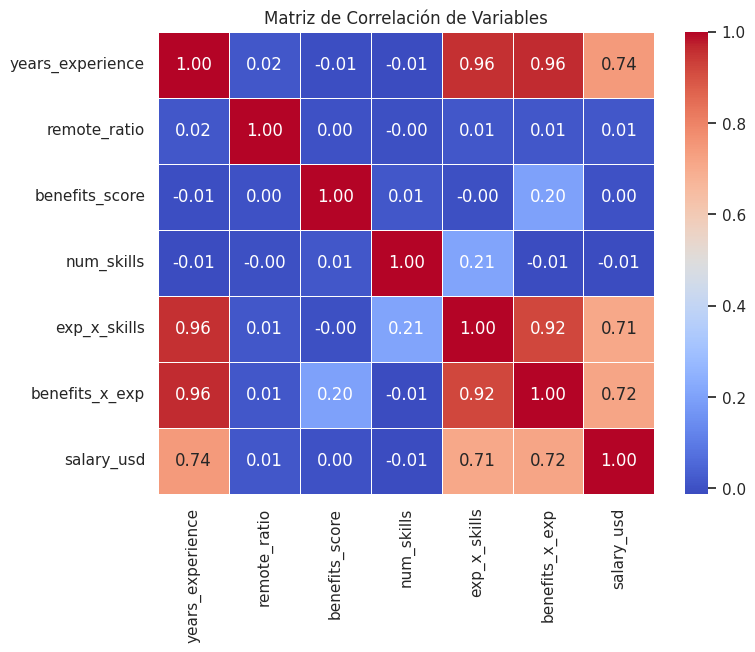


Correlaciones con la variable 'salary_usd':
salary_usd          1.000000
years_experience    0.743224
benefits_x_exp      0.717910
exp_x_skills        0.708450
remote_ratio        0.013149
benefits_score      0.001812
num_skills         -0.011578
Name: salary_usd, dtype: float64


In [30]:
#Ahora que todas las características están en 'copia_df', actualizamos 'df'
df = copia_df

#Calculamos la matriz de correlación con los valores numéricos (features y target)
corr_features = numerical_features + ["salary_usd"]

correlation_matrix = df[corr_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

print("\nCorrelaciones con la variable 'salary_usd':")
print(correlation_matrix["salary_usd"].sort_values(ascending=False))

Como vemos arriba, la variable numérica con mayor correlación con el salario es la de años de experiencia, y las features creadas a partir de ella.

In [31]:
#Ya con nuestras columnas definidas, separamos nuestras features de nuestro target

X = copia_df[total_features] #features
y = df["salary_usd"] #target

In [32]:
#A continuación, avanzamos con la división entrenamiento-testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=total_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=total_features)

print(f" Tamaño del conjunto de entrenamiento: {X_train_scaled.shape}")
print(f" Tamaño del conjunto de prueba: {X_test_scaled.shape}")

 Tamaño del conjunto de entrenamiento: (11613, 19)
 Tamaño del conjunto de prueba: (2904, 19)


#Modelos


Una vez preparados nuestros datos, analizaremos dos modelos de Machine Learning: Random Forest Regressor y XGBoost Regressor. Para la validación cruzada y optimización de hiperparámetros, ocuparemos GridSearch para RF y Halving GridSearch para XGB.

##Random Forest Regressor (Grid Search)

In [33]:
RF = RandomForestRegressor(random_state=42)
hiperparametros={'max_depth':[10, None],'min_samples_leaf':[1], 'min_samples_split': [2, 5], 'n_estimators':[100,200]}
grilla_rf=GridSearchCV(RF,hiperparametros,cv=3,scoring='r2', verbose=3)
grilla_rf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.872 total time=   4.0s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.874 total time=   2.4s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.875 total time=   2.5s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.873 total time=   5.0s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.875 total time=   5.1s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.876 total time=   4.8s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.872 total time=   2.7s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.874 total time=   2

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, None], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=3)

In [34]:
grilla_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [35]:
grilla_rf.best_score_

np.float64(0.8747905170862911)

In [36]:
modelo_RF=grilla_rf.best_estimator_
modelo_RF.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [37]:
#Procedemos a realizar las predicciones
y_train_pred = modelo_RF.predict(X_train_scaled)
y_test_pred = modelo_RF.predict(X_test_scaled)

#Calculamos las métricas para el set de Entrenamiento (Train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / np.maximum(y_train, 1))) * 100

#Mismas métricas calculadas, pero para el set de Testeo (Test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / np.maximum(y_test, 1))) * 100

# Creamos un DataFrame para comparar las métricas
df_metrics = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'RMSE ($)': [rmse_train, rmse_test],
    'MAE ($)': [mae_train, mae_test],
    'MAPE (%)': [mape_train, mape_test],
    'R2 (0-1)': [r2_train, r2_test]
})

#Vemos los resultados, según el formato que corresponda
pd.options.display.float_format = '{:,.2f}'.format
print("\n Evaluación de Desempeño del Modelo:")
print(df_metrics.to_string(index=False))


 Evaluación de Desempeño del Modelo:
  Set  RMSE ($)   MAE ($)  MAPE (%)  R2 (0-1)
Train 13,564.47 10,119.57      9.40      0.93
 Test 17,618.20 13,211.32     12.16      0.88


Interpretación:
- MAE: En promedio, las predicciones del modelo se desvían en $13,196.14 del valor real del salario.

- RMSE: La desviación típica de los errores es de $17,579.12.

- R²: El 88% de la varianza en el valor mediano de los salarios puede ser explicada por las características del modelo.


 Top 10 Variables más importantes:
                     feature  importance
0           years_experience        0.34
6         experience_encoded        0.30
7   company_location_encoded        0.23
8       company_size_encoded        0.05
5             benefits_x_exp        0.02
4               exp_x_skills        0.01
12   salary_currency_encoded        0.01
2             benefits_score        0.01
13         job_title_encoded        0.01
11          industry_encoded        0.01


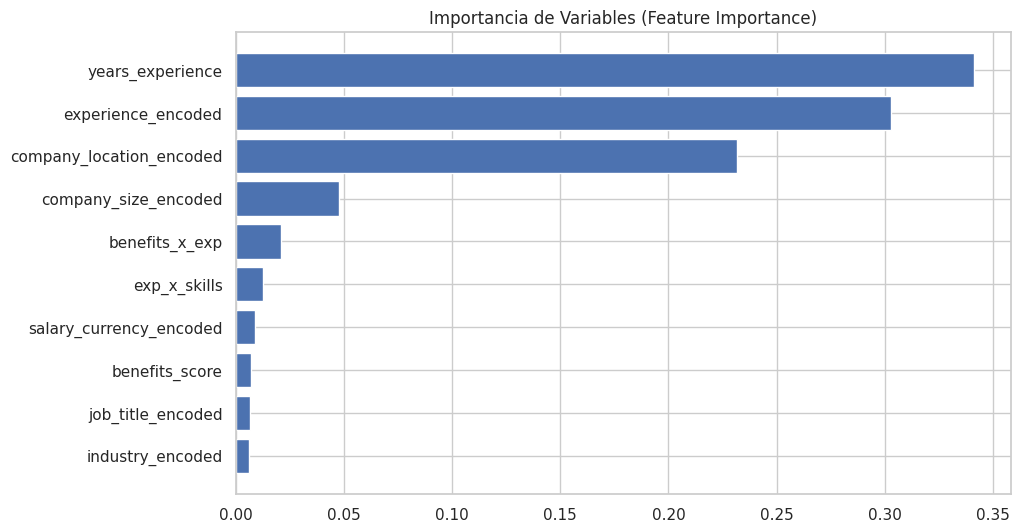

In [38]:
#Obtener importancia de las variables
importances = modelo_RF.feature_importances_
feature_names = X_train_scaled.columns

#Crear un DataFrame para visualizarlo
df_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

#Mostrar las Top 10 más importantes y graficar las relaciones
print("\n Top 10 Variables más importantes:")
print(df_importances.head(10))

plt.figure(figsize=(10, 6))
plt.barh(df_importances['feature'].head(10), df_importances['importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Importancia de Variables (Feature Importance)')
plt.show()

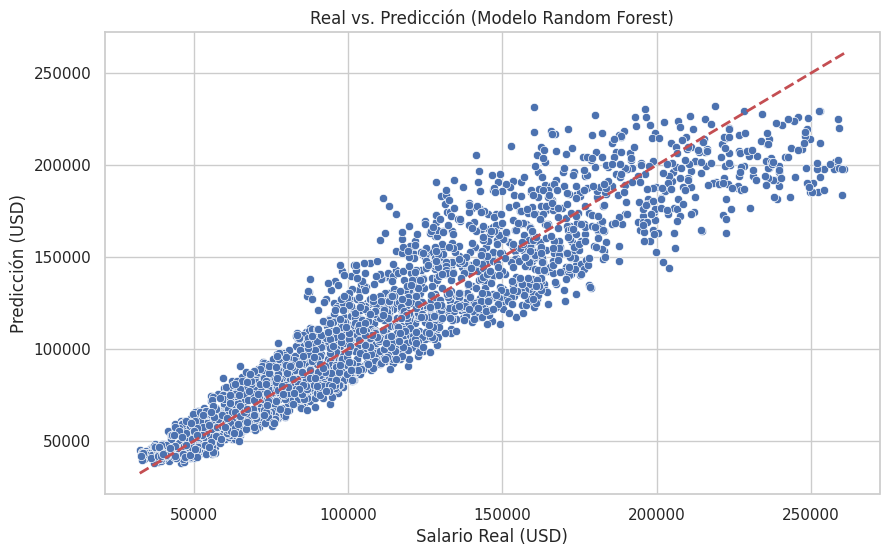

In [39]:
#Veamos gráficamente cómo performó el modelo entre los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=modelo_RF.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Salario Real (USD)')
plt.ylabel('Predicción (USD)')
plt.title('Real vs. Predicción (Modelo Random Forest)')
plt.show()

##XGBoost (Halving GridSearch)

In [40]:
XGB = xgb.XGBRegressor (random_state=42, tree_method='hist')
hiperparametros2={'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 7], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]}

grilla_xgb=HalvingGridSearchCV(XGB,hiperparametros2, cv=3, min_resources=100, scoring='r2', n_jobs=-1, verbose=2)
grilla_xgb.fit(X_train_scaled,y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 5
min_resources_: 100
max_resources_: 11613
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 100
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 1
n_candidates: 16
n_resources: 300
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 6
n_resources: 900
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 2
n_resources: 2700
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3,
                    estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                    min_resources=100, n_jobs=-1,
                    param_grid={'colsample_bytree': [0.8, 1.0],
                                'learning_rate': [0.01, 0.05, 0.1],
                                'max_depth': [3, 7], 'n_estimators': [100, 200],
                                'subsample': [0.8, 1.0]},
                    scoring='r2', verbose=2)

In [41]:
grilla_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [42]:
grilla_xgb.best_score_

np.float64(0.8626026709874471)

In [43]:
modelo_XGB=grilla_xgb.best_estimator_
modelo_XGB.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
#Al igual que con RF, analizaremos las métricas del modelo XGB
y_train_pred = modelo_XGB.predict(X_train_scaled)
y_test_pred = modelo_XGB.predict(X_test_scaled)

#Calculamos las métricas para el set de Entrenamiento (Train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / np.maximum(y_train, 1))) * 100

#Mismas métricas calculadas, pero para el set de Testeo (Test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / np.maximum(y_test, 1))) * 100

#Creamos un DataFrame para comparar las métricas
df_metrics = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'RMSE ($)': [rmse_train, rmse_test],
    'MAE ($)': [mae_train, mae_test],
    'MAPE (%)': [mape_train, mape_test],
    'R2 (0-1)': [r2_train, r2_test]
})

#Vemos los resultados, según el formato que corresponda
pd.options.display.float_format = '{:,.2f}'.format
print("\n Evaluación de Desempeño del Modelo:")
print(df_metrics.to_string(index=False))


 Evaluación de Desempeño del Modelo:
  Set  RMSE ($)   MAE ($)  MAPE (%)  R2 (0-1)
Train 16,497.98 12,566.02     11.69      0.89
 Test 17,337.36 13,018.88     12.11      0.88


Interpretación:
- MAE: En promedio, las predicciones del modelo se desvían en $13,106.97 del valor real del salario.

- RMSE: La desviación típica de los errores es de $17,388.01.

- R²: El 88% de la varianza en el valor mediano de los salarios puede ser explicada por las características del modelo.


 Top 10 Variables más importantes:
                       feature  importance
0             years_experience        0.71
8         company_size_encoded        0.09
7     company_location_encoded        0.08
12     salary_currency_encoded        0.05
5               benefits_x_exp        0.02
4                 exp_x_skills        0.01
14               emp_full_time        0.01
9   employee_residence_encoded        0.01
10  education_required_encoded        0.01
15               emp_part_time        0.00


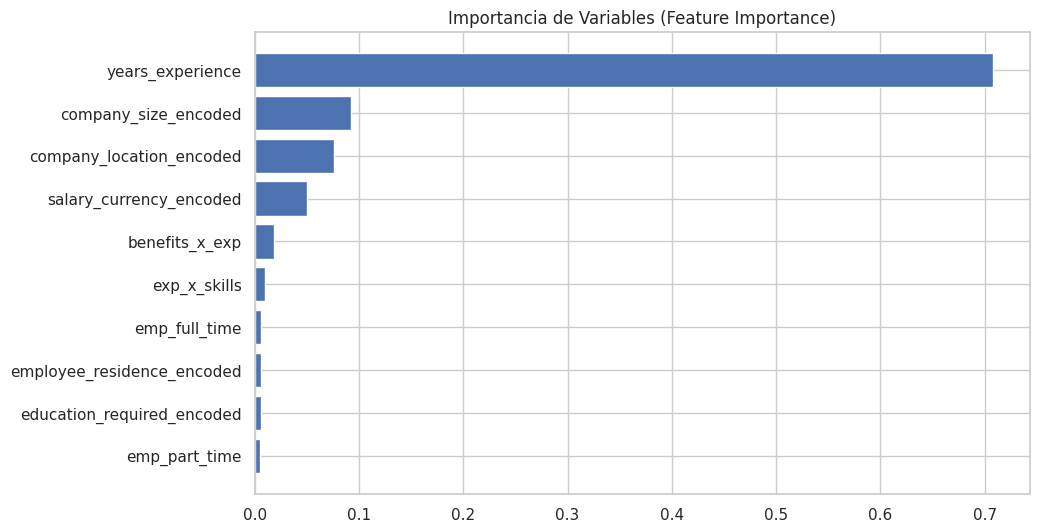

In [45]:
#Al igual que con RF, vemos en XGB las variables más importantes
importances2 = modelo_XGB.feature_importances_
feature_names2 = X_train_scaled.columns

df_importances2 = pd.DataFrame({
    'feature': feature_names2,
    'importance': importances2
}).sort_values(by='importance', ascending=False)

print("\n Top 10 Variables más importantes:")
print(df_importances2.head(10))

plt.figure(figsize=(10, 6))
plt.barh(df_importances2['feature'].head(10), df_importances2['importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Importancia de Variables (Feature Importance)')
plt.show()

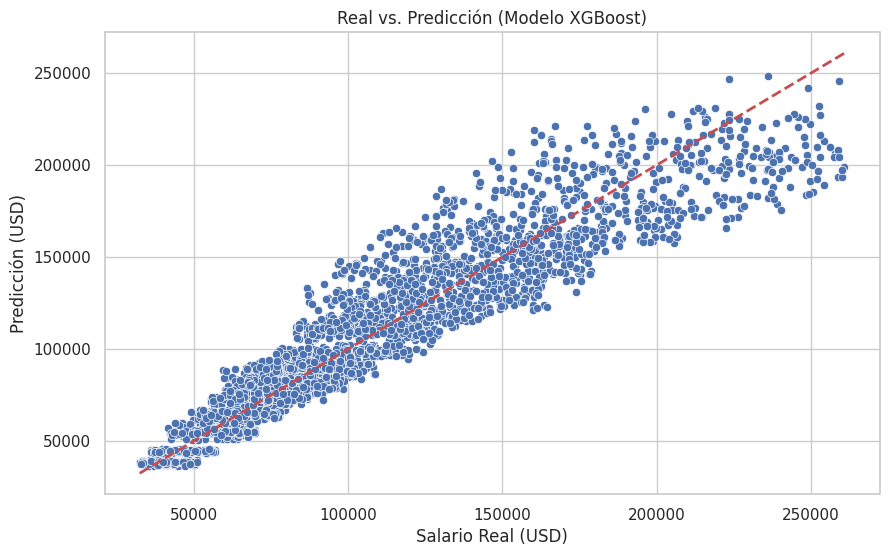

In [46]:
#Veamos gráficamente cómo performó el modelo entre los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=modelo_XGB.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Salario Real (USD)')
plt.ylabel('Predicción (USD)')
plt.title('Real vs. Predicción (Modelo XGBoost)')
plt.show()

#Conclusión

Luego de probar ambos modelos, podemos primeramente afirmar que ambos dieron buenos resultados (R²=0.88), por lo que aceptamos la Hipotesis Alternativa (HA) enunciada más arriba.

Ahora bien, al comparar las métricas de ambos modelos, los dos cuentan con valores muy similares en cuanto a RMSE, MAE y MAPE, siendo levemente mejor XGBoost en todas las métricas excepto el MAPE.

Esto significa que hay una alta capacidad predictiva, el error promedio es de $13.000, que representa un 12% de desviación sobre los salarios reales, y consideramos que es un margen de error competitivo para la variabilidad inherente al mercado laboral.

¿Esto significa que nos es indistinto escoger cualquiera de los dos modelos? De ninguna manera, y veremos el por qué.

Hay otros factores también, como la eficiencia computacional del modelo, o el nivel de importancia de las features, que nos hacen inclinarnos por XGBoost, el cual, optimizado con Halving GridSearch CV, es mucho más rápido y a la vez robusto.

Más de 2 minutos para aplicar la grilla al modelo vs 10 segundos, es una clara victoria del segundo modelo, y esto tiene que ver en cómo cada técnica trabaja:

* **GridSearch** evalúa todas las combinaciones de parámetros posibles utilizando todo el conjunto de datos en cada iteración, mientras que **Halving** empieza probando muchas combinaciones con una pequeña fracción de los datos, luego escoge las mejores combinaciones de hiperparámetros para una próxima iteración, asignando más recursos, y así sucesivamente hasta encontrar la mejor.

En cuanto al nivel de importancia de las variables, el segundo modelo supo identificar claramente a la cantidad de años de experiencia como fundamental para predecir un salario anual (75% en XBG contra 34% en RF), lo cual tiene mucho sentido si miramos la lógica del mercado laboral: en casi todas las profesiones (y especialmente en tecnología), el sueldo escala de forma más fuerte con los años que con cualquier otra variable. Además, el tamaño y el país de la empresa ocupan un segundo plano, lo cual es razonable.

###Finalmente, podemos concluir que **XGBoost optimizado mediante HalvingGridSearch** es el mejor modelo de regresión propuesto para predecir el salario promedio, con un **R² de 0.88** en el set de testeo y un **error promedio del 12%**, explicando la mayor parte de la variabilidad del sueldo basándose principalmente en la experiencia y la ubicación, así como el tamaño de la empresa.
###Este desempeño permite *rechazar la H0* y **validar la HA**, siendo la solución óptima aquí planteada para la predicción salarial en el ámbito del mercado laboral asociado a la Inteligencia Artificial.